In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib

In [ ]:
df =pd.read_csv("/content/vista minable - solicitudes de almacen.csv" , header = 0 )

In [ ]:
df.nunique()

,0
Internal ID,55622
Class,8
Fecha y Hora,203458
Field,2
Old Value,9
New Value,9
Role,13
Sociedad Anónima,4
Ubicación Anónima,49
Nombre Anónimo,452


In [ ]:
df.shape

(271256, 12)

<ipython-input-5-8b9a6fbe9cb3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=i, data=df_unique, palette='Set2', order=order)


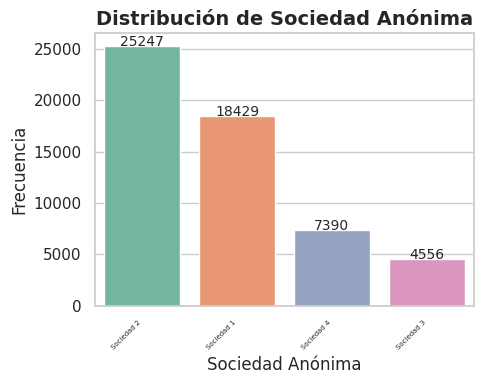

<ipython-input-5-8b9a6fbe9cb3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=i, data=df_unique, palette='Set2', order=order)


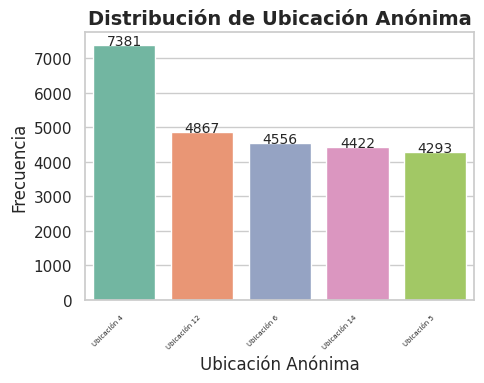

<ipython-input-5-8b9a6fbe9cb3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=i, data=df_unique, palette='Set2', order=order)


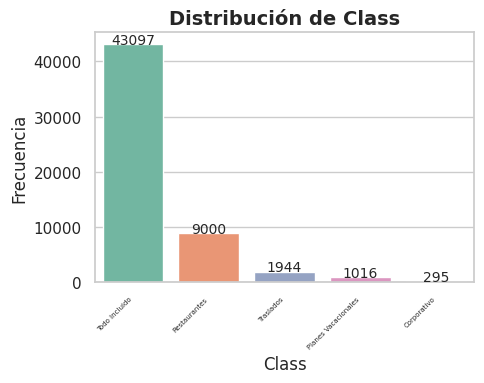

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_unique = df.drop_duplicates(subset= ['Internal ID'])

## NUMERO DE INTERACCIONES

# Set style for better aesthetics
sns.set(style="whitegrid")

# List of columns to plot
columns = ['Sociedad Anónima', 'Ubicación Anónima', 'Class']

# Assuming 'df_unique' and 'columns' are already defined
# Loop through each column and generate a count plot
for i in columns:
    # Get the top 5 most common categories in each column
    order = df_unique[i].value_counts().head().index

    # Create the count plot
    plt.figure(figsize=(5, 4))  # Adjust figure size
    ax = sns.countplot(x=i, data=df_unique, palette='Set2', order=order)

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right', fontsize=5)

    # Set plot titles and labels
    plt.title(f'Distribución de {i}', fontsize=14, fontweight='bold')
    plt.xlabel(i, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)

    # Add count labels inside the bars using a loop for all patches
    for p in ax.patches:
        height = p.get_height()  # Get the height of the bar
        ax.text(
            p.get_x() + p.get_width() / 2.,  # Calculate the x-position for the label
            height + 3,  # Calculate the y-position for the label (adjust as needed)
            '{:1.0f}'.format(height),  # Format the label text (e.g., with 0 decimal places)
            ha="center",  # Horizontal alignment of the label
            fontsize=10,
        )

    # Show the plot with tight layout to prevent clipping
    plt.tight_layout()
    plt.show()

In [ ]:
# Tipo "class" que se tiene en el proceso
class_hotel = df.groupby('Ubicación Anónima')['Class'].nunique().sort_values(ascending=False).reset_index()
class_hotel['Class'].value_counts()

,count
Class,
1,39
2,7
3,2
4,1


In [ ]:
freq_new_value = df['New Value'].value_counts().reset_index() #reset_index(): This is used to turn the result of value_counts() into a DataFrame where the Value is the index and Frequency is the column.
freq_new_value.columns = ['Nombre Proceso' , 'Frecuencia en NV']

freq_old_value = df['Old Value'].value_counts().reset_index()
freq_old_value.columns = ['Nombre Proceso' , 'Frecuencia en OV']

freq_table = pd.merge ( freq_old_value , freq_new_value , on = 'Nombre Proceso' , how = 'outer' ).fillna(0)
freq_table


,Nombre Proceso,Frecuencia en OV,Frecuencia en NV
0,Anulada,0.0,920.0
1,Aprobada,876.0,54953.0
2,Cerrado por faltante,0.0,13100.0
3,Completada,12.0,41778.0
4,Creada,111244.0,0.0
5,Entrega Parcial,48218.0,48513.0
6,Parcialmente completado,3.0,3.0
7,Pendiente,55762.0,56056.0
8,Pendiente por Entregar,55117.0,55586.0
9,Pending Fulfillment,8.0,0.0


In [ ]:
facturas_sociedad = df.groupby('Sociedad Anónima')['Internal ID'].nunique().sort_values(ascending=False).reset_index()
facturas_sociedad

,Sociedad Anónima,Internal ID
0,Sociedad 2,25247
1,Sociedad 1,18429
2,Sociedad 4,7390
3,Sociedad 3,4556


In [ ]:
##USUARIOS UNICOS QUE INTERVIENEN EN CADA FACTURACION
usuarios_factura = df.groupby('Internal ID')['Nombre Anónimo'].nunique().sort_values(ascending=False).reset_index()
usuarios_factura


,Internal ID,Nombre Anónimo
0,71429,6
1,99073,6
2,98952,6
3,79766,6
4,102801,5
...,...,...
55617,79236,1
55618,79234,1
55619,79242,1
55620,78778,1


In [ ]:
usuarios_factura.describe()

,Internal ID,Nombre Anónimo
count,55622.000000,55622.000000
mean,117921.305796,2.940725
std,34552.402247,0.376337
min,63267.000000,1.000000
25%,87047.250000,3.000000
50%,115981.500000,3.000000
75%,148166.250000,3.000000
max,179676.000000,6.000000


In [ ]:
usuarios_proceso = df.groupby('New Value')['Nombre Anónimo'].nunique().sort_values(ascending=False).reset_index()
usuarios_proceso

,New Value,Nombre Anónimo
0,Pendiente,361
1,Pendiente por Entregar,339
2,Cerrado por faltante,227
3,Anulada,159
4,Completada,121
5,Entrega Parcial,113
6,Aprobada,78
7,Rechazado,46
8,Parcialmente completado,1


In [ ]:
# 1. Average Timestamp by 'Document Number'
avg_timestamp_by_doc = df.groupby('Internal ID')['TimeStamp'].mean().reset_index()

# 2. Average Timestamp by 'New Value'
avg_timestamp_by_new_value = df.groupby('New Value')['TimeStamp'].mean().reset_index()

# Display the results
print("Average Timestamp by Internal ID:")
print(avg_timestamp_by_doc)

print("\nAverage Timestamp by New Value:")
print(avg_timestamp_by_new_value)

Average Timestamp by Internal ID:
       Internal ID    TimeStamp
0            63267   512.270833
1            63268  1825.470833
2            63271   422.745833
3            63273  1135.454167
4            63274  1136.662500
...            ...          ...
55617       179672     1.520833
55618       179673     0.579167
55619       179674    10.487500
55620       179675    10.608333
55621       179676    10.145833

[55622 rows x 2 columns]

Average Timestamp by New Value:
                 New Value    TimeStamp
0                  Anulada     0.000070
1                 Aprobada  2778.726144
2     Cerrado por faltante  5819.568580
3               Completada   163.179150
4          Entrega Parcial  1761.965396
5  Parcialmente completado     0.016667
6                Pendiente   703.332136
7   Pendiente por Entregar   629.400496
8                Rechazado  3186.150538


In [ ]:
avg_timestamp_by_doc

,Internal ID,TimeStamp
0,63267,512.270833
1,63268,1825.470833
2,63271,422.745833
3,63273,1135.454167
4,63274,1136.662500
...,...,...
55617,179672,1.520833
55618,179673,0.579167
55619,179674,10.487500
55620,179675,10.608333


In [ ]:
avg_timestamp_by_doc['TimeStamp'].mean()

np.float64(1575.2261687714351)